In [85]:
import pandas as pd
import re
import numpy as np

from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score, plot_confusion_matrix,plot_roc_curve, f1_score, precision_score,recall_score

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('data/emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
#Here 1 is spam and 0 is not spam
data['spam'].value_counts()


0    4360
1    1368
Name: spam, dtype: int64

In [19]:
data['text'][3]

'Subject: 4 color printing special  request additional information now ! click here  click here for a printable version of our order form ( pdf format )  phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com  request additional information now ! click here  click here for a printable version of our order form ( pdf format )  golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation . '

In [32]:
#Let's preprocess the data
def CleanText(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) #replace non-Ascii characters 
    text = re.sub(r'\d+', '', text) #remove number
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    text= str(text).lower()
    text=  text.replace('\n','')
    
    return text

data['cleaned_text']=data['text'].apply(lambda x: CleanText(x))

data['cleaned_text'][0]

'subject naturally irresistible your corporate identity lt is really hard to recollect a company the market is full of suqgestions and the information isoverwhelminq but a good catchy logo stylish statlonery and outstanding website will make the task much easier we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader it isguite ciear that without good products effective business organization and practicable aim it will be hotat nowadays market but we do promise that your marketing efforts will become much more effective here is the list of clear benefits creativeness hand made original logos specially done to reflect your distinctive company image convenience logo and stationery are provided in all formats easy to use content management system letsyou change your website content and even its structure promptness you will see logo drafts within three business days affordability your marketing break through shouldn t make gaps in your budget sat

In [33]:
data['cleaned_text'][3]

'subject color printing special request additional information now click here click here for a printable version of our order form pdf format phone fax e mail ramsey goldengraphix com request additional information now click here click here for a printable version of our order form pdf format golden graphix printing azusa canyon rd irwindale ca this e mail message is an advertisement and or solicitation '

In [42]:
#Splitting data

X_train, X_test, Y_train, Y_test= train_test_split(data['cleaned_text'], data['spam'], train_size=0.8) 

In [44]:
X_train[0]

'subject naturally irresistible your corporate identity lt is really hard to recollect a company the market is full of suqgestions and the information isoverwhelminq but a good catchy logo stylish statlonery and outstanding website will make the task much easier we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader it isguite ciear that without good products effective business organization and practicable aim it will be hotat nowadays market but we do promise that your marketing efforts will become much more effective here is the list of clear benefits creativeness hand made original logos specially done to reflect your distinctive company image convenience logo and stationery are provided in all formats easy to use content management system letsyou change your website content and even its structure promptness you will see logo drafts within three business days affordability your marketing break through shouldn t make gaps in your budget sat

In [57]:
#Tokenizing the text values

word_size=100
max_feature = 50000

tokenizer = Tokenizer(num_words= max_feature)
tokenizer.fit_on_texts(X_train)

X_train_features = np.array(tokenizer.texts_to_sequences(X_train))
X_test_features = np.array(tokenizer.texts_to_sequences(X_test))
X_train_features[0]

[15,
 719,
 2,
 10,
 266,
 4332,
 1000,
 383,
 1312,
 21,
 107,
 31,
 21,
 47,
 37,
 30,
 13,
 12,
 35,
 1905,
 12,
 35,
 2,
 550,
 10,
 32,
 46,
 1905,
 9138,
 326,
 709,
 88,
 15,
 719,
 2,
 10,
 266,
 4332,
 21,
 36,
 393,
 2938,
 5051,
 2,
 1,
 266,
 891,
 149,
 34,
 6,
 23,
 38,
 373,
 492,
 77,
 1165,
 2,
 45,
 2175,
 16,
 108,
 5,
 464,
 4,
 376,
 25,
 1,
 10,
 1312,
 194,
 126,
 23,
 5,
 2762,
 2,
 102,
 19,
 10,
 55,
 1325,
 242,
 79,
 25,
 5051,
 8323,
 684,
 9138,
 326,
 709,
 88,
 139,
 211,
 551,
 48,
 2,
 1905,
 15,
 43,
 114,
 25,
 10,
 1325,
 8,
 163,
 1220,
 45,
 203,
 787,
 2,
 116,
 817,
 183,
 3,
 1427,
 93,
 1242,
 25,
 168,
 8,
 41,
 17,
 96,
 1441,
 2,
 18409,
 45,
 203,
 34,
 713,
 55,
 2938]

In [60]:
#padding the tokens
from keras.preprocessing.sequence import pad_sequences
maxLen = 2000

X_train_features = pad_sequences(X_train_features, maxlen=maxLen)
X_test_features = pad_sequences(X_test_features, maxlen=maxLen)
X_train_features[0]


array([   0,    0,    0, ...,  713,   55, 2938])

In [61]:
#Embedding
import tensorflow as tf
from keras.layers import Dense,LSTM, Embedding, Dropout, Activation, Bidirectional

embedding_vector_length = 32

model = tf.keras.Sequential()

model.add(Embedding(max_feature, embedding_vector_length, input_length=max_len))

model.add(Bidirectional(tf.keras.layers.LSTM(64)))

model.add(Dense(16, activation='relu'))

model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 32)          1600000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,651,745
Trainable params: 1,651,745
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
history = model.fit(X_train_features, Y_train, batch_size=32, epochs=10, validation_data=(X_test_features, Y_test))

Epoch 1/10
144/144 [==============================] - 384s 3s/step - loss: 0.2824 - accuracy: 0.8935 - val_loss: 0.0642 - val_accuracy: 0.9791
Epoch 2/10
144/144 [==============================] - 372s 3s/step - loss: 0.0335 - accuracy: 0.9902 - val_loss: 0.0271 - val_accuracy: 0.9887
Epoch 3/10
144/144 [==============================] - 381s 3s/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.0232 - val_accuracy: 0.9930
Epoch 4/10
144/144 [==============================] - 392s 3s/step - loss: 9.2206e-04 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 0.9956
Epoch 5/10
144/144 [==============================] - 397s 3s/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0803 - val_accuracy: 0.9747
Epoch 6/10
144/144 [==============================] - 390s 3s/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0170 - val_accuracy: 0.9948
Epoch 7/10
144/144 [==============================] - 386s 3s/step - loss: 4.8829e-04 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy

In [74]:
model.predict(X_test_features[0])


array([[0.5022327 ],
       [0.5022327 ],
       [0.5022327 ],
       ...,
       [0.35516667],
       [0.1331583 ],
       [0.18995976]], dtype=float32)

In [75]:
y_predict = [1 if o>0.5 else 0 for o in model.predict(X_test_features)]

In [90]:
print('Accuracy is ', accuracy_score(Y_test, y_predict)) 

print('Classification Report of \n',classification_report(Y_test, y_predict))

print('Confusion matrix : \n{}'.format(confusion_matrix(Y_test, y_predict)))
#plot_confusion_matrix(model, X_test_features, Y_test,cmap=plt.cm.Blues)

Accuracy is  0.993891797556719
Classification Report of 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       877
           1       0.99      0.98      0.99       269

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

Confusion matrix : 
[[875   2]
 [  5 264]]


In [96]:
cf_matrix =confusion_matrix(Y_test,y_predict)

print("Precision: {:.2f}%".format(100 * precision_score(Y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(Y_test, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(Y_test,y_predict)))

Precision: 99.25%
Recall: 98.14%
F1 Score: 98.69%


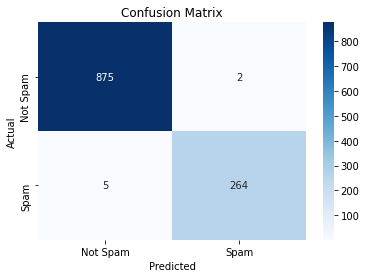

In [95]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='')
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
#print classification report
#create your own graphs
#Create other models suchas DT, RF, LR